In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
%matplotlib inline


In [2]:
data_folder = r'C:\Users\ocni\PycharmProjects\delphin_6_automation\data_process\simtime_prediction\data'
excel_file = os.path.join(data_folder, 'sim_time.xlsx')

data = pd.read_excel(excel_file)
data.shape

(910, 23)

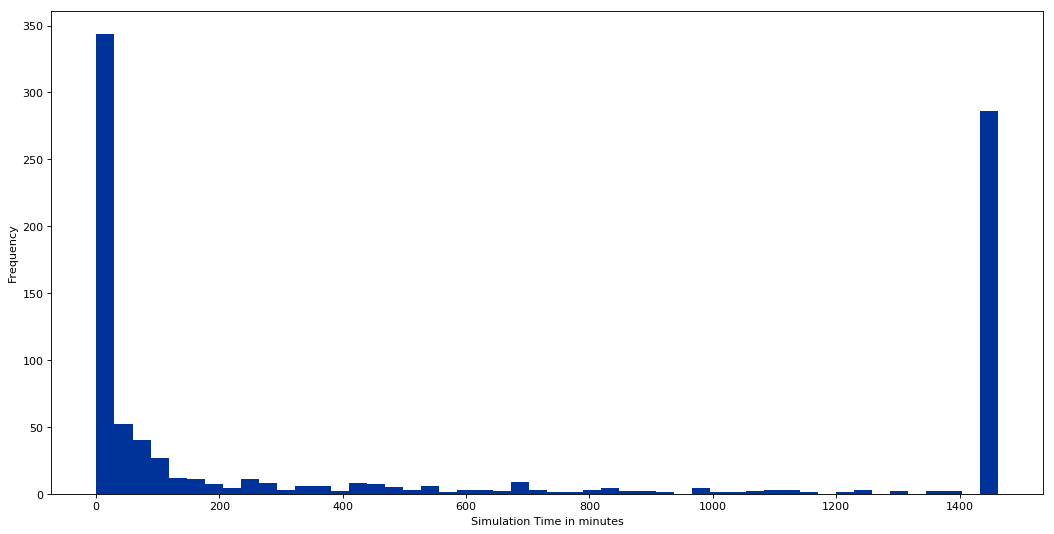

In [89]:
plt.figure(figsize=(16, 8), dpi= 80, facecolor='w', edgecolor='k')
(data['time'][data['time'] < 1500 * 60] / 60).plot('hist', bins=50, color='#003399')
plt.xlabel('Simulation Time in minutes')
#plt.savefig('simulation_time_histogram.pdf')

In [90]:
(data['time'][data['time'] < 1500 * 60] / 60).describe()

count     908.000000
mean      558.813633
std       642.751202
min         0.936520
25%         8.745378
50%       109.247849
75%      1440.104352
max      1462.459091
Name: time, dtype: float64

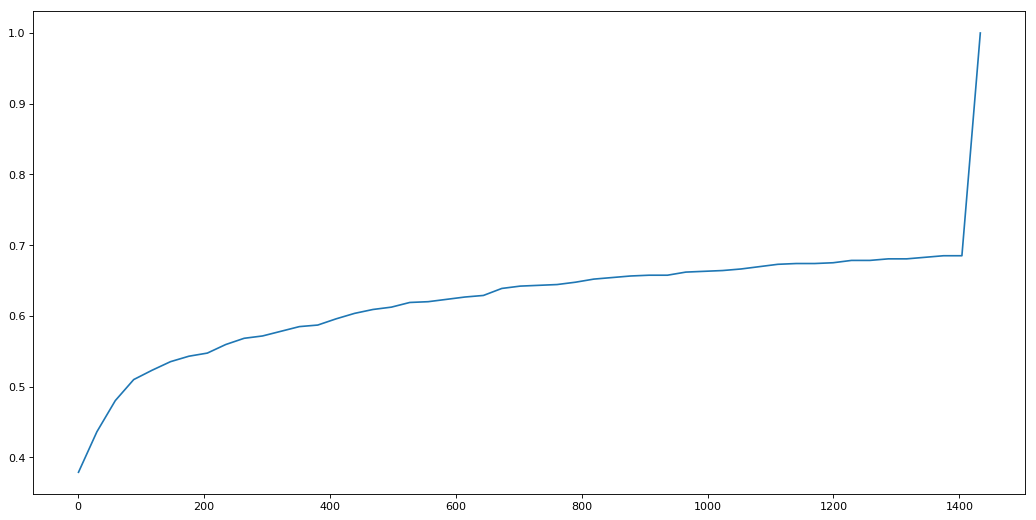

In [85]:
hist, edges = np.histogram((data['time'][data['time'] < 1500 * 60] / 60), density=True, bins=50)
dx = edges[1] - edges[0]
cdf = np.cumsum(hist) * dx

plt.figure(figsize=(16, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(edges[:-1], cdf)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor

c:\users\ocni\appdata\local\continuum\anaconda3\envs\ribuild\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working



In [4]:
y_data = data['time']

x_data = data.loc[:, data.columns != 'time']
x_data.loc[:, 'exterior_climate'] = np.ones(len(x_data['exterior_climate']))
x_data = x_data.fillna(0.0)
x_data.loc[x_data.loc[:, 'interior_climate'] == 'a', 'interior_climate'] = 0.0
x_data.loc[x_data.loc[:, 'interior_climate'] == 'b', 'interior_climate'] = 1.0
x_data.loc[x_data.loc[:, 'system_name'] == 'ClimateBoard', 'system_name'] = 1.0
x_data.head()

c:\users\ocni\appdata\local\continuum\anaconda3\envs\ribuild\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,design_option,sequence,exterior_climate,exterior_heat_transfer_coefficient_slope,exterior_moisture_transfer_coefficient,solar_absorption,rain_scale_factor,interior_climate,interior_heat_transfer_coefficient,interior_moisture_transfer_coefficient,...,wall_core_width,wall_core_material,plaster_width,plaster_material,exterior_plaster,system_name,insulation_material,finish_material,detail_material,insulation_thickness
0,0.0,0.0,1.0,3.947266,5.652344e-09,0.40625,0.339844,0,8.671875,4.843750e-09,...,0.8,563,0.010664,148,True,0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,3.947266,5.652344e-09,0.40625,0.339844,0,8.671875,4.843750e-09,...,0.8,563,0.010664,148,False,0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,3.947266,5.652344e-09,0.40625,0.339844,0,8.671875,4.843750e-09,...,0.8,563,0.010664,148,True,1,707.0,722.0,705.0,25.0
3,0.0,0.0,1.0,3.947266,5.652344e-09,0.40625,0.339844,0,8.671875,4.843750e-09,...,0.8,563,0.010664,148,True,1,707.0,722.0,705.0,30.0
4,0.0,0.0,1.0,3.947266,5.652344e-09,0.40625,0.339844,0,8.671875,4.843750e-09,...,0.8,563,0.010664,148,True,1,707.0,722.0,705.0,50.0


In [25]:
x_data.columns

Index(['design_option', 'sequence', 'exterior_climate',
       'exterior_heat_transfer_coefficient_slope',
       'exterior_moisture_transfer_coefficient', 'solar_absorption',
       'rain_scale_factor', 'interior_climate',
       'interior_heat_transfer_coefficient',
       'interior_moisture_transfer_coefficient', 'interior_sd_value',
       'wall_orientation', 'wall_core_width', 'wall_core_material',
       'plaster_width', 'plaster_material', 'exterior_plaster', 'system_name',
       'insulation_material', 'finish_material', 'detail_material',
       'insulation_thickness'],
      dtype='object')

In [102]:
processed_data = x_data.assign(time=y_data/60)

plt_data = [
    go.Parcoords(
        line = dict(color = processed_data['time'],
                   colorscale = 'Jet',
                   showscale = True,
                   cmin = 0,
                   cmax = 1500),
                   
        dimensions = list([
            dict(range = [0,1440],
                label = 'Time', values = processed_data['time'],
                tickformat='r'),
            
            dict(range = [0, 5],
                label = 'Ext. Heat\nTransfer Coef. Slope', 
                values = processed_data['exterior_heat_transfer_coefficient_slope']),
            
            dict(range = [4 * 10 ** -9, 10 ** -8],
                label = 'Ext. Moisture Transfer Coef.', 
                values = processed_data['exterior_moisture_transfer_coefficient'],
                tickformat='e'),
            
            dict(range = [0.4, 0.8],
                label = 'Solar Absorption', values = processed_data['solar_absorption'],
                tickformat='.1f'),
            
            dict(range = [0.0, 2.0],
                label = 'Rain Scale Factor', values = processed_data['rain_scale_factor']),
            
            dict(range = [0.0, 1.0],
                label = 'Int. Climate', values = processed_data['interior_climate']),
            
            dict(range = [4.0, 11.0],
                label = 'Int. Heat Transfer Coef.', 
                values = processed_data['interior_heat_transfer_coefficient']),
            
            dict(range = [4 * 10 ** -9, 10 ** -8],
                label = 'Int. Moisture Transfer Coef.', 
                values = processed_data['interior_moisture_transfer_coefficient'],
                tickformat='e'),
            
            dict(range = [0.0, 0.6],
                label = 'Int. Sd Value', values = processed_data['interior_sd_value'],
                tickformat='.1f'),
            
            dict(range = [0.0, 360.0],
                label = 'Wall Orientation', values = processed_data['wall_orientation']),
            
            dict(range = [0.0, 1.0],
                label = 'Wall Core Width', values = processed_data['wall_core_width']),
            
            dict(range = [0.0, 1000],
                label = 'Wall Core Material', values = processed_data['wall_core_material'],
                tickformat='r'),
            
            dict(range = [0.01, 0.02],
                label = 'Plaster Width', values = processed_data['plaster_width'],
                tickformat='.2f'),
            
            dict(range = [0.0, 1000],
                label = 'Plaster Material', values = processed_data['plaster_material'],
                tickformat='r'),
            
            dict(range = [0.0, 1.0],
                label = 'Ext. Plaster', values = processed_data['exterior_plaster']),
            
            dict(range = [0.0, 1.0],
                label = 'System', values = processed_data['system_name']),
            
            dict(range = [0.0, 1000],
                label = 'Insulation Material', values = processed_data['insulation_material'],
                tickformat='r'),
            
            dict(range = [0.0, 1000],
                label = 'Finish Material', values = processed_data['finish_material'],
                tickformat='r'),
            
            dict(range = [0.0, 1000],
                label = 'Detail Material', values = processed_data['detail_material'],
                tickformat='r'),
            
            dict(range = [0.0, 200],
                label = 'Insulation Thickness', values = processed_data['insulation_thickness']),
        ])
    )
]

layout = go.Layout(
    plot_bgcolor = '#E5E5E5',
    paper_bgcolor = '#E5E5E5'
)

fig = go.Figure(data = plt_data, layout = layout)
plot(fig, filename = 'sim_time.html')

'file://C:\\Users\\ocni\\PycharmProjects\\delphin_6_automation\\data_process\\simtime_prediction\\sim_time.html'

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, random_state=0)

In [12]:
# Linear Model
linreg = linear_model.LinearRegression(normalize=True)
linreg.fit(X_train, y_train)

print('linear model intercept: {}'.format(linreg.intercept_))
print('linear model coeff:\n{}'.format(linreg.coef_))
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))
print('Number of non-zero features: {}'.format(np.sum(linreg.coef_ != 0)))

linear model intercept: 32482.880955415232
linear model coeff:
[ 0.00000000e+00 -2.76486389e-08 -8.00355338e-09 -1.31168318e+03
 -1.83765671e+12 -4.63605291e+04  3.36024330e+04  3.74389268e+03
  2.10530945e+03 -4.71320133e+11  2.25374546e+04  5.26862731e+01
 -1.51557448e+04  2.70673274e+01 -4.04535215e+05 -4.49497329e+04
 -1.80159510e+04  7.74066617e+01 -2.49528407e+01 -2.55545404e+01
  2.26605303e+01]
R-squared score (training): 0.519
R-squared score (test): 0.609
Number of non-zero features: 20


In [13]:
# Ridge Model

linridge = linear_model.Ridge(alpha=20.0).fit(X_train, y_train)

print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))
print('R-squared score (training): {:.3f}'.format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))


ridge regression linear model intercept: -6451.791983746429
ridge regression linear model coeff:
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.07723215e+03
 -1.99175622e-04 -1.42138054e+04  2.88601245e+04  3.22149102e+03
  1.22629834e+03 -9.54586335e-05  8.05623512e+03  5.01136286e+01
 -5.99029750e+03  2.58811209e+01 -1.72981623e+02 -4.03231381e+04
  1.09631461e-01 -1.56022060e+02  7.91539158e+01  7.72901810e+01
  1.15837561e+01]
R-squared score (training): 0.495
R-squared score (test): 0.592
Number of non-zero features: 18


In [14]:
# Ridge Model Normalized
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge_normal = linear_model.Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('ridge regression linear model intercept: {}'.format(linridge_normal.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge_normal.coef_))
print('R-squared score (training): {:.3f}'.format(linridge_normal.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'.format(linridge_normal.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'.format(np.sum(linridge_normal.coef_ != 0)))

ridge regression linear model intercept: 19076.462274881553
ridge regression linear model coeff:
[     0.              0.              0.           1871.25540089
  -6492.23680267 -12720.9425476   44003.73600111   6669.12976491
   4613.80204355  -2098.88266525   9115.05353437  15167.14558948
  -6810.87813483   8198.79843907  -1173.99558604 -39770.31875001
    403.29861856    401.33706576    403.29861856    403.29861856
    386.9231038 ]
R-squared score (training): 0.496
R-squared score (test): 0.600
Number of non-zero features: 18


In [15]:
# K-nearest regression - 5 neighbors
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn_reg5_uni = KNeighborsRegressor(n_neighbors=5).fit(X_train_scaled, y_train)

#print(knn_reg5_uni.predict(X_test_scaled))
print('R-squared train score: {:.5f}'.format(knn_reg5_uni.score(X_train_scaled, y_train)))
print('R-squared test score: {:.5f}'.format(knn_reg5_uni.score(X_test_scaled, y_test)))

R-squared train score: 0.90101
R-squared test score: 0.90546


In [16]:
# K-nearest regression - 3 neighbors
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn_reg5_uni = KNeighborsRegressor(n_neighbors=3).fit(X_train_scaled, y_train)

#print(knn_reg5_uni.predict(X_test_scaled))
print('R-squared train score: {:.5f}'.format(knn_reg5_uni.score(X_train_scaled, y_train)))
print('R-squared test score: {:.5f}'.format(knn_reg5_uni.score(X_test_scaled, y_test)))

R-squared train score: 0.94225
R-squared test score: 0.91910


In [17]:
# K-nearest regression - 5 neighbors, weights = distance
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn_reg5 = KNeighborsRegressor(n_neighbors=3, weights='distance').fit(X_train_scaled, y_train)

#print(knn_reg5.predict(X_test_scaled))
print('R-squared train score: {:.5f}'.format(knn_reg5.score(X_train_scaled, y_train)))
print('R-squared test score: {:.5f}'.format(knn_reg5.score(X_test_scaled, y_test)))

R-squared train score: 1.00000
R-squared test score: 0.91603


In [28]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=5, test_size=0.25, random_state=47)
scaler = MinMaxScaler()

test_scores = []
for train_index, test_index in ss.split(x_data):
    x_train = scaler.fit_transform(x_data.iloc[train_index, :])
    x_test = scaler.transform(x_data.iloc[test_index, :])
    y_train = y_data.iloc[train_index]
    y_test = y_data.iloc[test_index]
    knn_reg = KNeighborsRegressor(n_neighbors=5, weights='distance').fit(x_train, y_train)
    #knn_reg = KNeighborsRegressor(n_neighbors=5).fit(x_train, y_train)
    test_scores.append(knn_reg.score(x_test, y_test))

mean_score = np.mean(test_scores)
print(f'Average R-squared test score: {mean_score:.5f}')

Average R-squared test score: 0.91219


In [10]:
# Cross Validation Score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

ss = ShuffleSplit(n_splits=5, test_size=0.25, random_state=47)
scaler = MinMaxScaler()
knn_reg = KNeighborsRegressor(n_neighbors=5, weights='distance')
#knn_reg = KNeighborsRegressor(n_neighbors=5)
validated_test_scores = cross_val_score(knn_reg, scaler.fit_transform(x_data), y_data, cv=ss)

print(f'Accuracy: {validated_test_scores.mean():.5f} (+/- {validated_test_scores.std()*2:.5f})')

Accuracy: 0.91220 (+/- 0.04608)


In [65]:
# Feature Importance
features = x_data.columns

col_del = []
feature_scores = []
for feat in features:
    feature_less_data = x_data.loc[:, x_data.columns != feat]
    test_scores = cross_val_score(knn_reg, scaler.fit_transform(feature_less_data), y_data, cv=ss, scoring='r2')
    feature_scores.append((feat, test_scores.mean()))
    if test_scores.mean() >= validated_test_scores.mean():
        col_del.append(feat)
feature_scores = sorted(feature_scores, key=lambda x: x[1])
width = len('exterior heat transfer coefficient slope')
print('Feature'.ljust(width, ' ') + '   Accuracy')  
for i in feature_scores:
    print(f'{i[0].ljust(width, " ")} - {i[1]:.5f}')

Feature                                    Accuracy
exterior_plaster                         - -0.83341
insulation_thickness                     - 0.71738
interior_climate                         - 0.88941
solar_absorption                         - 0.89634
rain_scale_factor                        - 0.89654
plaster_width                            - 0.90016
wall_core_width                          - 0.90911
exterior_moisture_transfer_coefficient   - 0.90921
exterior_heat_transfer_coefficient_slope - 0.90928
interior_heat_transfer_coefficient       - 0.91014
interior_sd_value                        - 0.91079
interior_moisture_transfer_coefficient   - 0.91127
plaster_material                         - 0.91138
insulation_material                      - 0.91187
design_option                            - 0.91220
sequence                                 - 0.91220
exterior_climate                         - 0.91220
system_name                              - 0.91220
finish_material              

In [66]:
print('Columns to delete:\n')
for col in col_del:
    print(f'\t{col}')

Columns to delete:

	design_option
	sequence
	exterior_climate
	wall_orientation
	wall_core_material
	system_name
	finish_material
	detail_material


In [72]:
clean_col = x_data.columns[[c not in col_del for c in x_data.columns.tolist()]]
cleaned_data = x_data.loc[:, clean_col]
clean_scores = cross_val_score(knn_reg, scaler.fit_transform(cleaned_data), y_data, cv=ss, scoring='r2')
print(f'Accuracy: {clean_scores.mean():.5f} (+/- {clean_scores.std()*2:.5f})')

Accuracy: 0.93525 (+/- 0.04236)
